In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [49]:
dataset = pd.read_csv("heartdp.csv")

In [50]:
# Exploratory Data Analysis
print("Dataset Shape:", dataset.shape)
print(dataset.head())

Dataset Shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [51]:

# Data Preprocessing
X = dataset.drop("target", axis=1)
y = dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


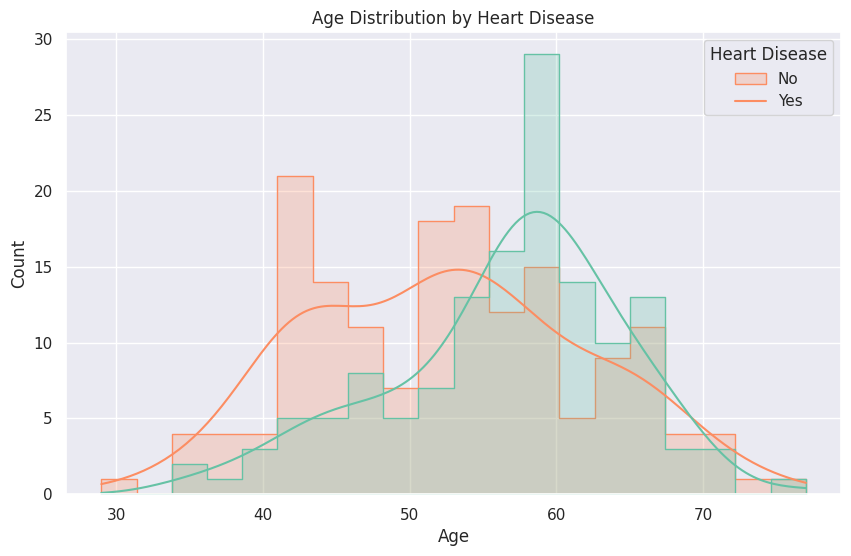

In [52]:
# Data Visualization: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='age', hue='target', element='step', bins=20, kde=True, palette="Set2")
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

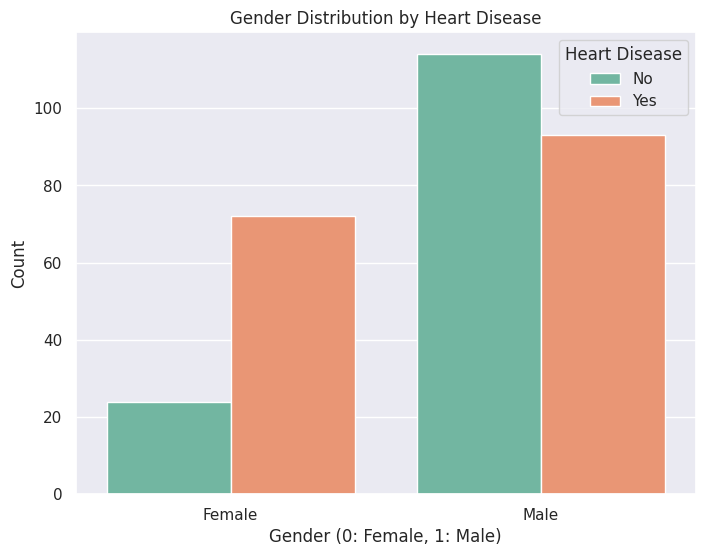

In [53]:

# Data Visualization: Gender and Heart Disease
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='sex', hue='target', palette="Set2")
plt.title("Gender Distribution by Heart Disease")
plt.xlabel("Gender (0: Female, 1: Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.show()



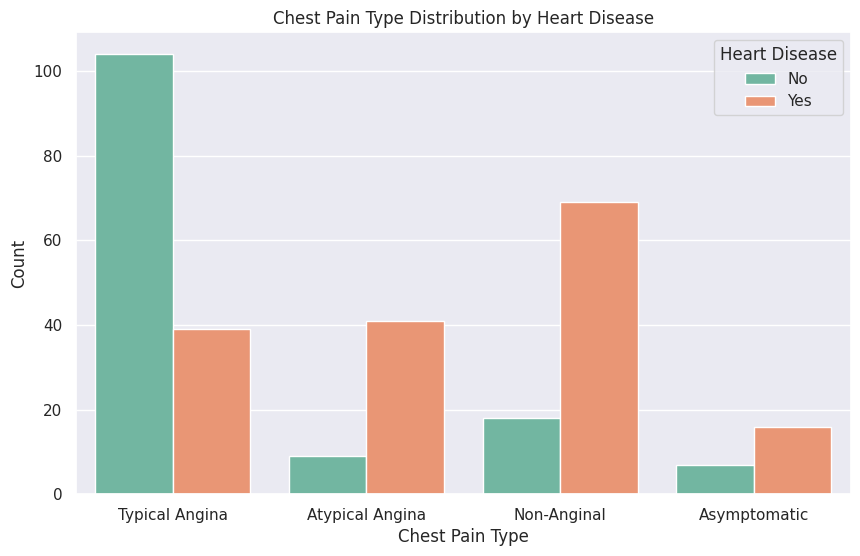

In [54]:
# Data Visualization: Chest Pain Type and Heart Disease
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='cp', hue='target', palette="Set2")
plt.title("Chest Pain Type Distribution by Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1, 2, 3], labels=["Typical Angina", "Atypical Angina", "Non-Anginal", "Asymptomatic"])
plt.show()


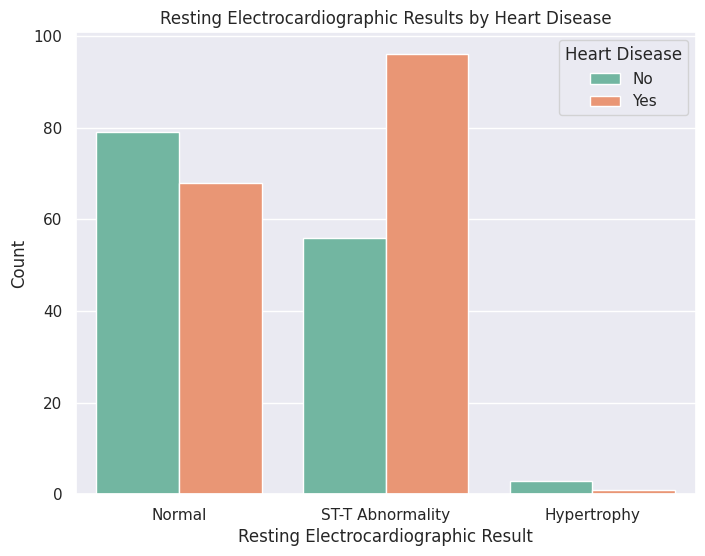

In [55]:

# Data Visualization: Resting Electrocardiographic Results and Heart Disease
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='restecg', hue='target', palette="Set2")
plt.title("Resting Electrocardiographic Results by Heart Disease")
plt.xlabel("Resting Electrocardiographic Result")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1, 2], labels=["Normal", "ST-T Abnormality", "Hypertrophy"])
plt.show()


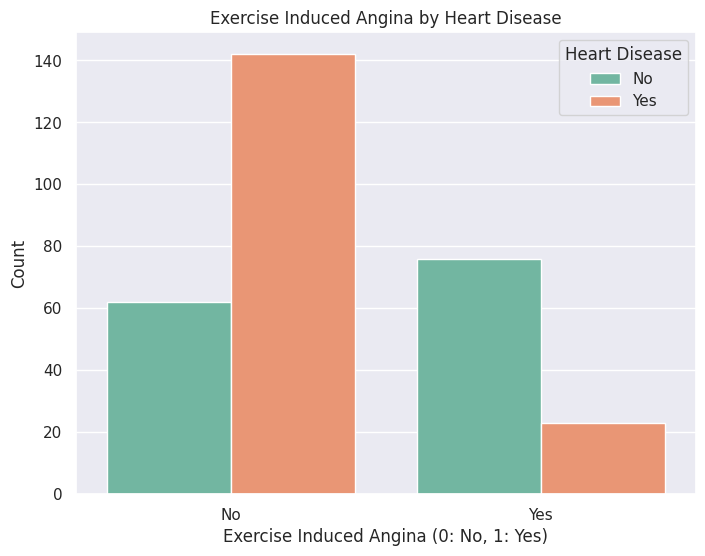

In [56]:

# Data Visualization: Exercise Induced Angina and Heart Disease
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='exang', hue='target', palette="Set2")
plt.title("Exercise Induced Angina by Heart Disease")
plt.xlabel("Exercise Induced Angina (0: No, 1: Yes)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

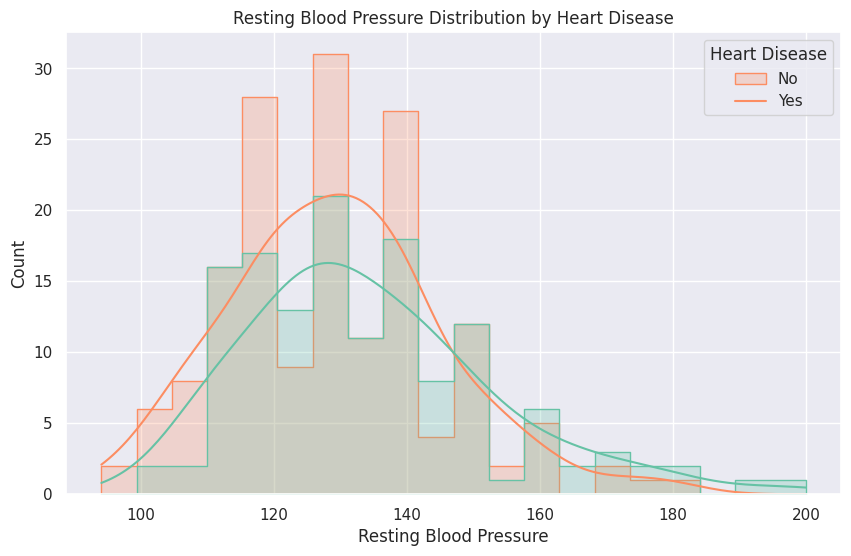

In [57]:
# Data Visualization: Resting Blood Pressure Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='trestbps', hue='target', element='step', bins=20, kde=True, palette="Set2")
plt.title("Resting Blood Pressure Distribution by Heart Disease")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


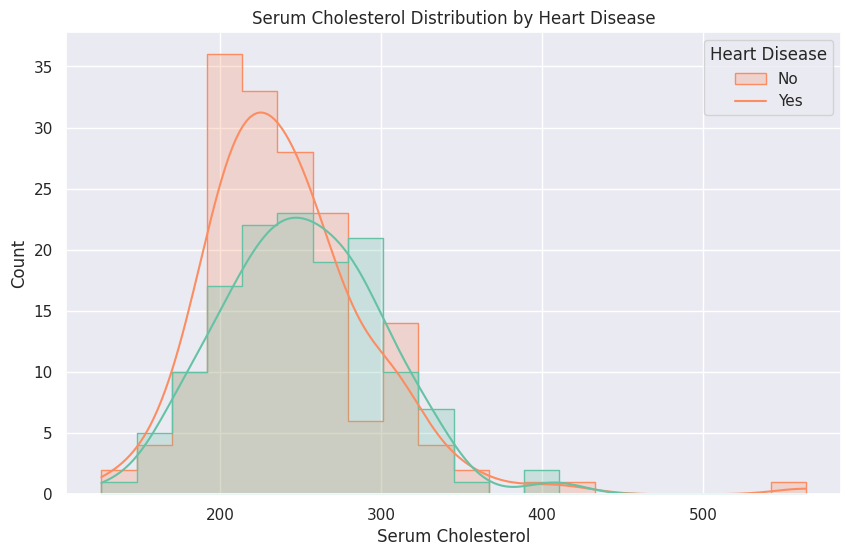

In [58]:

# Data Visualization: Serum Cholesterol Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='chol', hue='target', element='step', bins=20, kde=True, palette="Set2")
plt.title("Serum Cholesterol Distribution by Heart Disease")
plt.xlabel("Serum Cholesterol")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


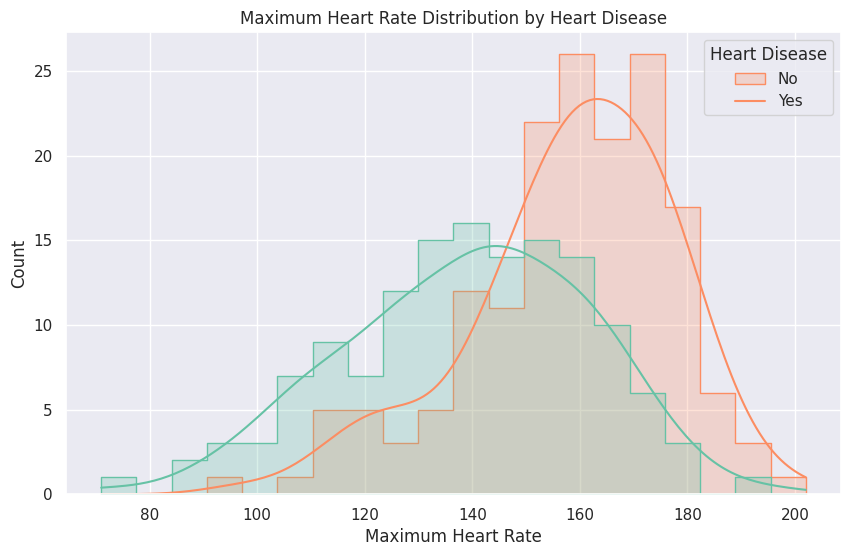

In [59]:

# Data Visualization: Maximum Heart Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='thalach', hue='target', element='step', bins=20, kde=True, palette="Set2")
plt.title("Maximum Heart Rate Distribution by Heart Disease")
plt.xlabel("Maximum Heart Rate")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()



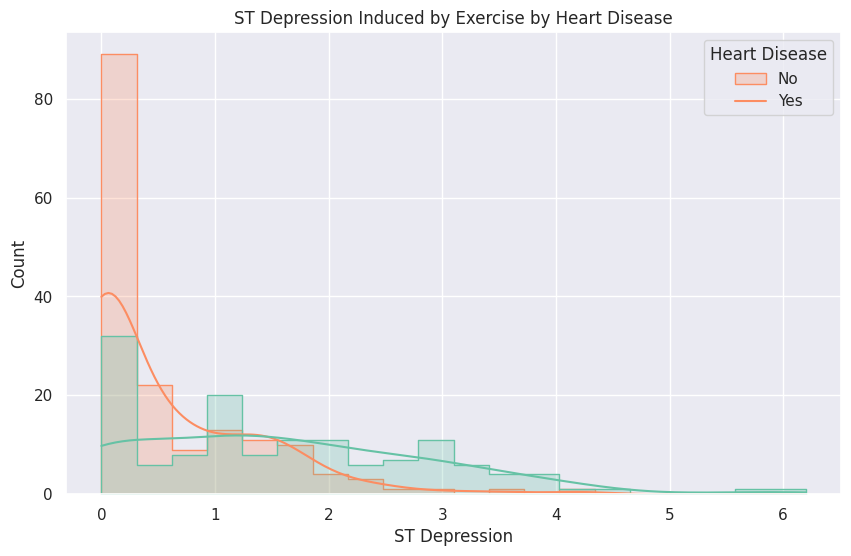

In [60]:
# Data Visualization: ST Depression Induced by Exercise
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='oldpeak', hue='target', element='step', bins=20, kde=True, palette="Set2")
plt.title("ST Depression Induced by Exercise by Heart Disease")
plt.xlabel("ST Depression")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


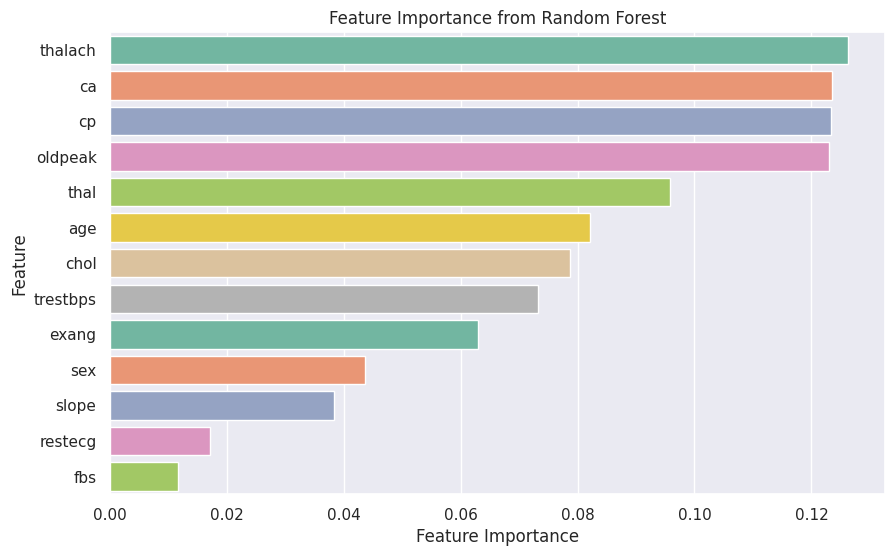

In [61]:
# Feature Importance Visualization (Using Random Forest as an example)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

feature_importances = rf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=X.columns[sorted_idx], palette="Set2")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()



In [62]:
# Hyperparameter Tuning (Using GridSearchCV for Random Forest as an example)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_

print("Best Parameters:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.8431069958847738


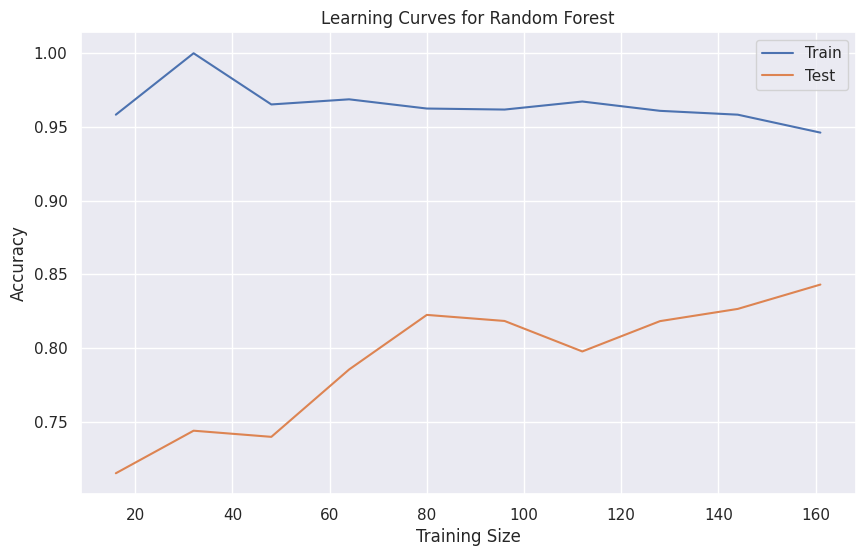

In [63]:

# Learning Curves (Using RandomForestClassifier as an example)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_rf, X_train_scaled, y_train, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test")
plt.title("Learning Curves for Random Forest")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [64]:

# List of classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}



In [65]:
# Dictionary to store results
results = {}

# Evaluate classifiers
for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    y_proba = classifier.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC Score": auc_score
    }



In [66]:
# Create a DataFrame for summary report
summary_df = pd.DataFrame(results).T


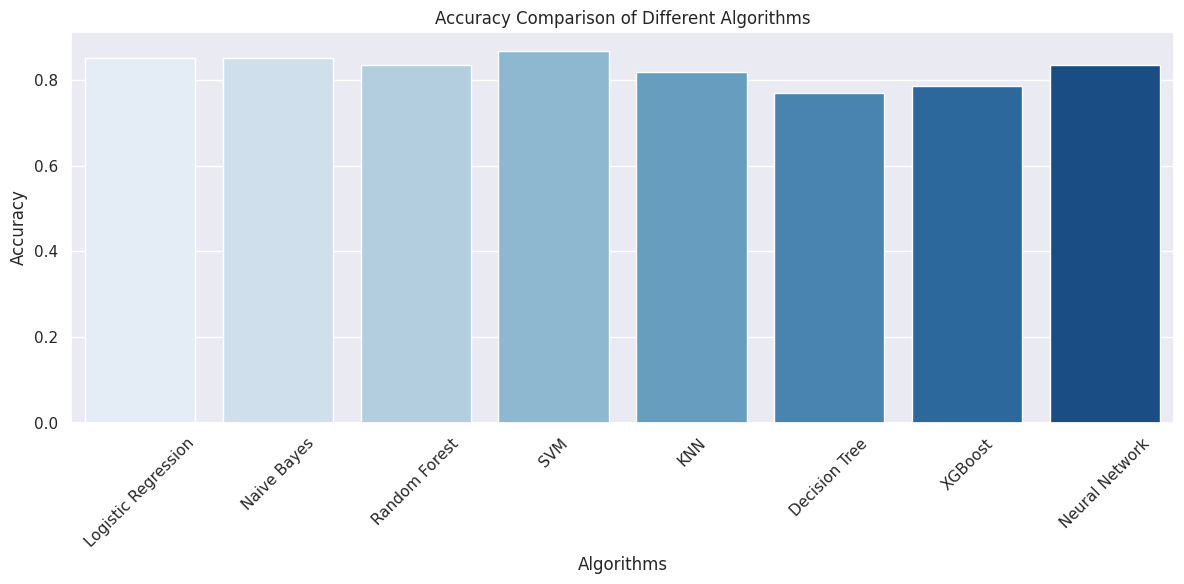

In [67]:

# Visualization: Comparing Algorithms
sns.set(rc={'figure.figsize':(12, 6)})
sns.barplot(x=summary_df.index, y=summary_df["Accuracy"], palette="Blues")
plt.xticks(rotation=45)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Algorithms")
plt.tight_layout()
plt.show()


In [68]:

# Detailed Evaluation
for name, result in results.items():
    print(f"\nClassifier: {name}")
    print("Classification Report:")
    print(classification_report(y_test, classifiers[name].predict(X_test_scaled)))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, classifiers[name].predict(X_test_scaled)))
    print("="*60)




Classifier: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
[[21  6]
 [ 3 31]]

Classifier: Naive Bayes
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
[[21  6]
 [ 3 31]]

Classifier: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
         

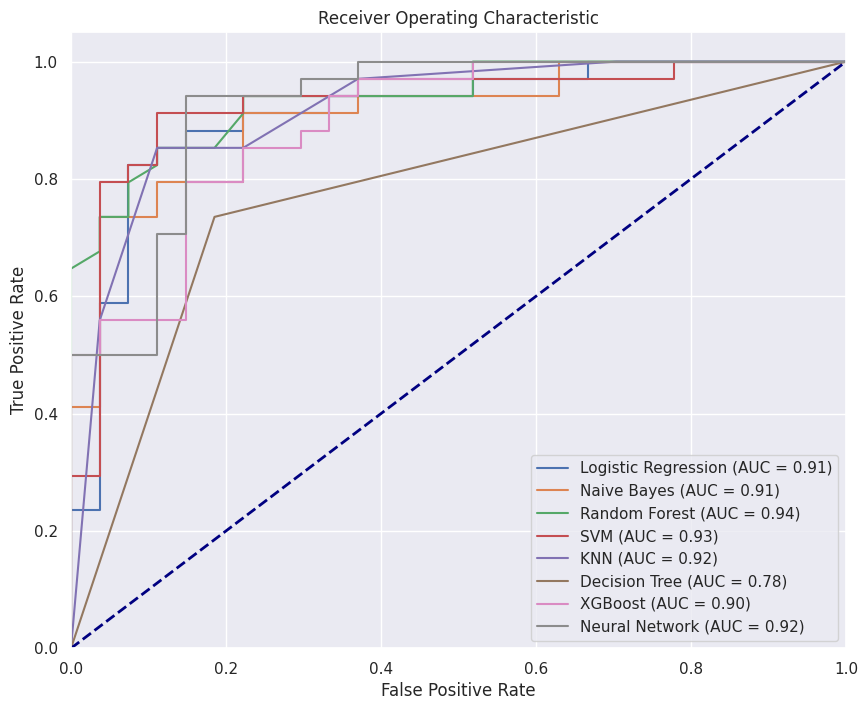

In [69]:
# Visualizing ROC Curves
plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, classifiers[name].predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
